In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

In [10]:
data=pd.read_csv("student_evaluation.csv")

In [11]:
data.shape

(5820, 33)

In [12]:
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [13]:
pd.isnull(data).sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [14]:
data.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [18]:
kmeans = KMeans(n_clusters=2)

In [19]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
pred=kmeans.predict(data)

In [21]:
pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int32)

In [23]:
pd.Series(pred).value_counts()

1    3148
0    2672
dtype: int64

In [24]:
kmeans.inertia_

231353.7586857733

In [25]:
kmeans.score(data)

-231353.75868577315

In [26]:
SSE = []

In [29]:
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

In [31]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})

In [32]:
frame

,Cluster,SSE
0,1,373025.672852
1,2,231353.758686
2,3,180375.713822
3,4,152888.211081
4,5,133015.723147
5,6,119620.465325
6,7,112440.178177
7,8,105896.017119
8,9,101318.708332
9,10,97656.570184


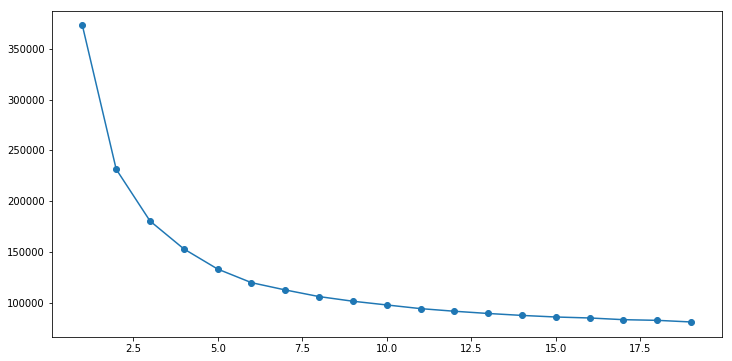

In [33]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

In [36]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,...,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03
mean,-1.459981e-14,8.602130e-15,-7.344278e-15,-1.382514e-15,2.960976e-16,1.688760e-15,-1.091681e-15,-2.070890e-16,2.644849e-15,-8.257618e-16,...,-2.832251e-15,1.454354e-16,3.596054e-15,3.714783e-15,1.333717e-15,1.432836e-15,1.561485e-15,2.261345e-15,7.546464e-16,-1.237956e-15
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,...,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-2.067850e+00,-1.701879e+00,-4.021740e-01,-1.136118e+00,-1.322221e+00,-1.439189e+00,-1.613740e+00,-1.738145e+00,-1.621254e+00,-1.646630e+00,...,-1.783194e+00,-1.790026e+00,-1.817034e+00,-1.827343e+00,-1.730392e+00,-1.698417e+00,-1.839472e+00,-1.748929e+00,-1.668120e+00,-1.805160e+00
25%,-6.758900e-01,-8.883988e-01,-4.021740e-01,-1.136118e+00,-1.322221e+00,-6.934552e-01,-8.356154e-01,-9.403527e-01,-8.427308e-01,-8.646959e-01,...,-2.063210e-01,-2.235345e-01,-2.420638e-01,-2.503655e-01,-9.445255e-01,-9.145943e-01,-2.486068e-01,-9.618909e-01,-8.939823e-01,-2.409479e-01
50%,7.160704e-01,-7.491846e-02,-4.021740e-01,-4.580819e-01,1.605008e-01,5.227822e-02,-5.749034e-02,-1.425608e-01,-6.420806e-02,-8.276145e-02,...,-2.063210e-01,-2.235345e-01,-2.420638e-01,-2.503655e-01,-1.586587e-01,-1.307718e-01,-2.486068e-01,-1.748524e-01,-1.198450e-01,-2.409479e-01
75%,7.160704e-01,7.385619e-01,-4.021740e-01,8.979896e-01,9.018615e-01,7.980117e-01,7.206347e-01,6.552312e-01,7.143147e-01,6.991730e-01,...,5.821153e-01,5.597111e-01,5.454215e-01,5.381232e-01,6.272081e-01,6.530507e-01,5.468257e-01,6.121861e-01,6.542923e-01,5.411584e-01
max,7.160704e-01,1.552042e+00,3.354893e+00,1.576025e+00,1.643222e+00,1.543745e+00,1.498760e+00,1.453023e+00,1.492837e+00,1.481107e+00,...,1.370552e+00,1.342957e+00,1.332907e+00,1.326612e+00,1.413075e+00,1.436873e+00,1.342258e+00,1.399225e+00,1.428430e+00,1.323265e+00


In [37]:
SSE_scaled = []

In [38]:
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

In [40]:
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.xlabel("Clusters")
plt.ylabel("SSE")

ValueError: arrays must all be same length

In [42]:
kmeans = KMeans(n_jobs = -1, n_clusters = 4)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [43]:
pred

array([0, 0, 3, ..., 3, 2, 2], dtype=int32)

In [44]:
frame = pd.DataFrame(data_scaled)

In [45]:
frame['cluster'] = pred

In [46]:
frame.loc[frame['cluster']==2,:]

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,cluster
4,-2.06785,-1.430719,-0.402174,-1.136118,-1.322221,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,...,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,2
13,-2.06785,-1.430719,-0.402174,-0.458082,-0.580860,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,...,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,2
14,-2.06785,-1.430719,-0.402174,0.219954,0.160501,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,...,-0.223535,-0.242064,-0.250365,-0.944525,-0.914594,-1.839472,-1.748929,-1.668120,-1.805160,2
16,-2.06785,-1.430719,-0.402174,0.897990,0.901862,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,...,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,2
18,-2.06785,-1.430719,-0.402174,-0.458082,0.901862,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,...,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,2
20,-2.06785,-1.430719,-0.402174,0.219954,0.901862,-0.693455,-0.835615,-0.940353,-0.842731,-0.864696,...,-1.006780,-1.029549,-1.038854,-0.944525,-0.914594,-1.044039,-0.961891,-0.893982,-1.023054,2
21,-2.06785,-1.430719,-0.402174,0.219954,-1.322221,-1.439189,-1.613740,-1.738145,-1.621254,-1.646630,...,-1.790026,-1.817034,-1.827343,-1.730392,-1.698417,-1.839472,-1.748929,-1.668120,-1.805160,2
25,-2.06785,-1.430719,-0.402174,-1.136118,-0.580860,-1.439189,-1.613740,-0.940353,-0.842731,-0.864696,...,-1.006780,-1.029549,-1.038854,-0.944525,-0.914594,-1.044039,-0.961891,-0.893982,-1.023054,2
27,-2.06785,-1.430719,-0.402174,0.219954,0.901862,-0.693455,-0.835615,-0.940353,-0.842731,-0.864696,...,-1.006780,-1.029549,-1.038854,-0.944525,-0.914594,-1.044039,-0.961891,-0.893982,-1.023054,2
34,-2.06785,-1.430719,-0.402174,0.219954,0.160501,-1.439189,-1.613740,-1.738145,-1.621254,-0.864696,...,-1.006780,-1.029549,-1.038854,-0.944525,-0.914594,-1.044039,-0.961891,-0.893982,-1.023054,2
